In [13]:
import csv_loader as loader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from hijri_converter import convert as hijri_convert

In [14]:
terrorism = loader.get_csv_file('terrorism')
wars = loader.get_csv_file('israeli_wars')
holidays = loader.get_csv_file('islam_holidays')

c:\Users\yvesk\Desktop\analyst_project\Project\csv_loader.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['approxdate'] = pd.to_datetime(dict(year=dataframe['iyear'], month=dataframe['imonth'], day=dataframe['iday']))
c:\Users\yvesk\Desktop\analyst_project\Project\csv_loader.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.drop(columns=drop_columns, inplace=True)
c:\Users\yvesk\Desktop\analyst_project\Project\csv_loader.py:61: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst

In [15]:
terrorism.head()

,iyear,imonth,iday,approxdate,country_txt,region_txt,provstate,city,latitude,longitude,...,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,hostkidoutcome_txt,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,,,,,,,,,,,,,,,,,,,,,
197000000001,1970,7,2,1970-07-02,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
197001010002,1970,1,1,1970-01-01,United States,North America,Illinois,Cairo,37.005105,-89.176269,...,NaN,NaN,NaN,NaN,NaN,NaN,-9,-9,0,-9
197001020001,1970,1,2,1970-01-02,Uruguay,South America,Montevideo,Montevideo,-34.891151,-56.187214,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
197001020002,1970,1,2,1970-01-02,United States,North America,California,Oakland,37.791927,-122.225906,...,NaN,NaN,NaN,NaN,NaN,NaN,-9,-9,0,-9
197001020003,1970,1,2,1970-01-02,United States,North America,Wisconsin,Madison,43.076592,-89.412488,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [16]:
wars.head()

,start,end,type
name,,,
Atzmaut,1947,1949,War
Sinai,1956,1956,War
6 Day,1967,1967,War
Hatasha,1967,1970,War
Yom Kipurim,1973,1973,War


In [17]:
holidays.head()

,start_date,end_date
name,,
Lailat al Miraj,2017-04-24,2017-04-25
Lailat al Bara'ah,2017-05-10,2017-05-11
Ramadan,2017-05-27,2017-06-24
Laylat al Qadr,2017-06-21,2017-06-21
Eid-al-Fitr,2017-06-25,2017-06-25


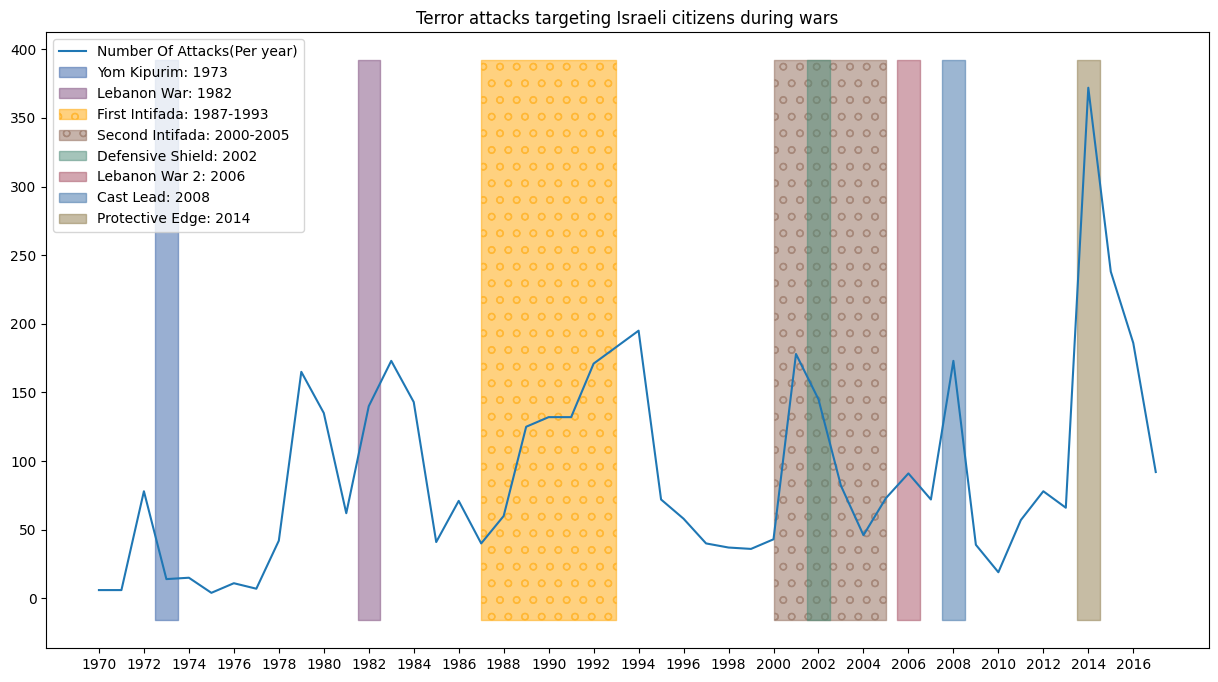

In [18]:
# Question - Does war in israel contribute to terror attacks against israeli citizents inside and abroad?
# We want to show the amount of terror attacks

attacks = terrorism[(terrorism['country_txt'] == 'Israel') | (terrorism['natlty1_txt'] == 'Israel') | (terrorism['natlty2_txt'] == 'Israel') | (terrorism['natlty3_txt'] == 'Israel')].copy()
attacks = attacks[['iyear']]

# Reset index
attacks.reset_index(inplace = True)

# Calclate attacks per year
attacks = attacks.groupby(['iyear']).aggregate(attacks=('eventid', 'count'))
attacks.reset_index(inplace=True)

# Show plot
plt.subplots(figsize=(15, 8))
plt.plot(attacks['iyear'], attacks['attacks'], label='Number Of Attacks(Per year)')
plt.title('Terror attacks targeting Israeli citizens during wars')

# Adjust amount of years shown
plt.xticks(np.arange(min(attacks['iyear']), max(attacks['iyear'])+1, 2))

# Show all wars in timeframes - From 1970 since this is all the data we have
colors = ['#3561A7', '#7F4D7E', '#FFA500', '#8F6957', '#4C8B77', '#A64F63', '#3A6FA6', '#8E7B4A', '#6F64A3', '#A08263']
israeli_wars = wars[wars['start'] > 1970]

for index, war in enumerate(israeli_wars.index.to_list()):
    war_details = wars.loc[war]
    start, end, war_type = war_details[['start', 'end', 'type']]

    # Set label
    label = None
    if start == end:
        label = f"{war}: {start}"
    else:
        label = f"{war}: {start}-{end}"
    
    # Adjust years
    if end - start < 2:
        start -= 0.5
        end += 0.5

    # Create war timeframe
    y1 = min(attacks['attacks']) - 20
    y2 = max(attacks['attacks']) + 20

    hatch = None
    if war_type == 'Operation':
        hatch = 'o'

    plt.fill_between(x=[start, end], y1=y1, y2=y2, color=colors[index], alpha=0.5, label=label, hatch=hatch)

plt.legend(loc='upper left')
plt.show();

# Conclusion - We can see pretty clearly that terror attacks against israeli citizens have almost always risen to some peak 
# Probably making the war start in the first place. A war has always caused some time with less terror attacks, yet it almost always
# started rising some time later, eventually causing a temporary "quiet time" before terror attacks started again.

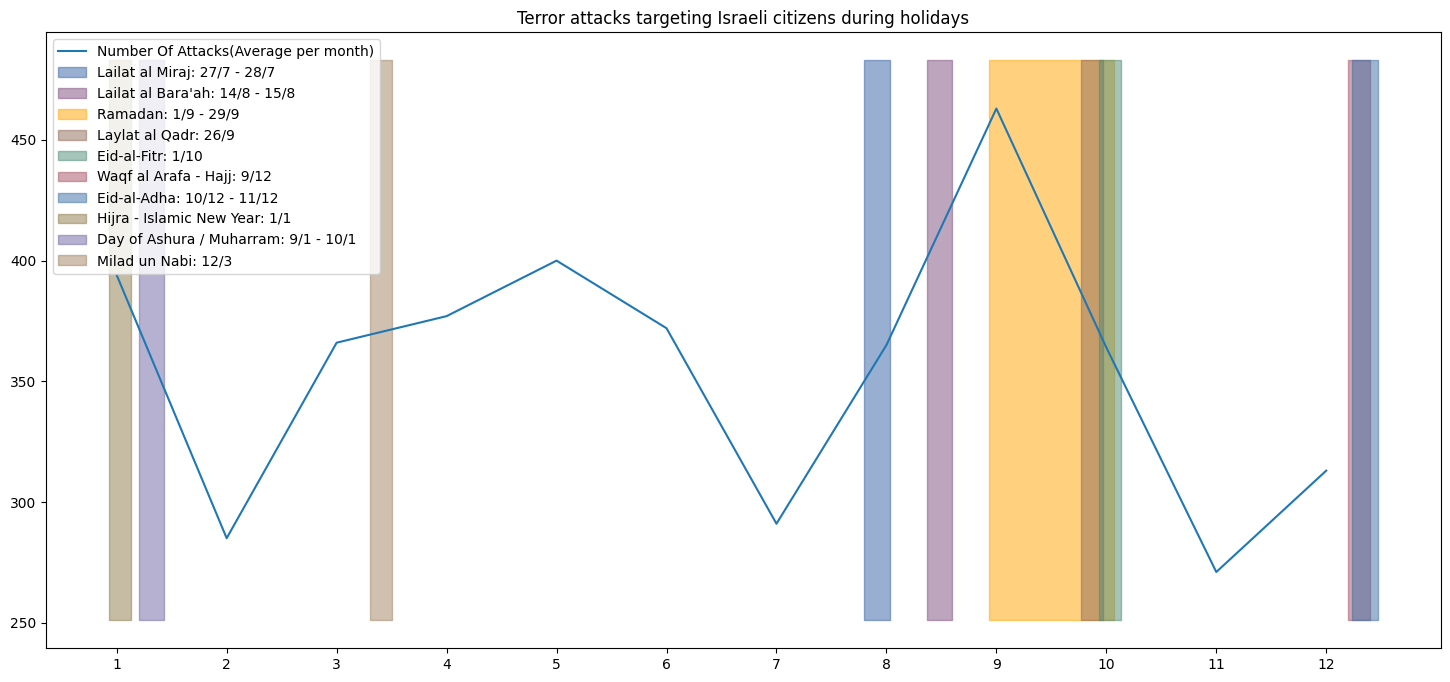

In [25]:
# Question - Does islamic holidays contribute to terror attacks against israeli citizents inside and abroad?
# We want to show the amount of terror attacks

attacks = terrorism[(terrorism['country_txt'] == 'Israel') | (terrorism['natlty1_txt'] == 'Israel') | (terrorism['natlty2_txt'] == 'Israel') | (terrorism['natlty3_txt'] == 'Israel')].copy()

# Convert all dates to hijri dates(islamic calendar)
for attack in attacks.index.to_list():
    year, month, day = attacks.loc[attack, ['iyear', 'imonth', 'iday']]
    hijri_date = hijri_convert.Gregorian(year, month, day).to_hijri()
    attacks.loc[attack, 'hijri_month'] = hijri_date.month

# Reset index
attacks.reset_index(inplace = True)

# Calclate attacks per year
attacks = attacks.groupby(['hijri_month']).aggregate(attacks=('eventid', 'count'))
attacks.reset_index(inplace=True)

# Show plot
plt.subplots(figsize=(18, 8))
plt.plot(attacks['hijri_month'], attacks['attacks'], label='Number Of Attacks(Average per month)')
plt.title('Terror attacks targeting Israeli citizens during holidays')

# Show all islamic holidays
colors = ['#3561A7', '#7F4D7E', '#FFA500', '#8F6957', '#4C8B77', '#A64F63', '#3A6FA6', '#8E7B4A', '#6F64A3', '#A08263']
for index, holiday in enumerate(holidays.index.to_list()):
    holiday_details = holidays.loc[holiday]
    start, end = holiday_details[['start_date', 'end_date']]

    # Calculate hijri dates
    hijri_start = hijri_convert.Gregorian(pd.Timestamp(start).year, pd.Timestamp(start).month, pd.Timestamp(start).day).to_hijri()
    hijri_end = hijri_convert.Gregorian(pd.Timestamp(end).year, pd.Timestamp(end).month, pd.Timestamp(end).day).to_hijri()

    # Set label
    label = None
    if hijri_start == hijri_end:
        label = f"{holiday}: {hijri_start.day}/{hijri_start.month}"
    else:
        label = f"{holiday}: {hijri_start.day}/{hijri_start.month} - {hijri_end.day}/{hijri_end.month}"

    # Calculate start and end
    start = hijri_start.month + (hijri_start.day / 30)
    end = hijri_end.month + (hijri_end.day / 30)

    # Adjust months
    if end - start < 2:
        start -= 0.1
        end += 0.1

    # Create war timeframe
    y1 = min(attacks['attacks']) - 20
    y2 = max(attacks['attacks']) + 20

    plt.fill_between(x=[start, end], y1=y1, y2=y2, color=colors[index], alpha=0.5, label=label)

# Adjust amount of years shown
plt.xticks(np.arange(min(attacks['hijri_month']), max(attacks['hijri_month'])+1, 1))

plt.legend(loc='upper left')
plt.show();

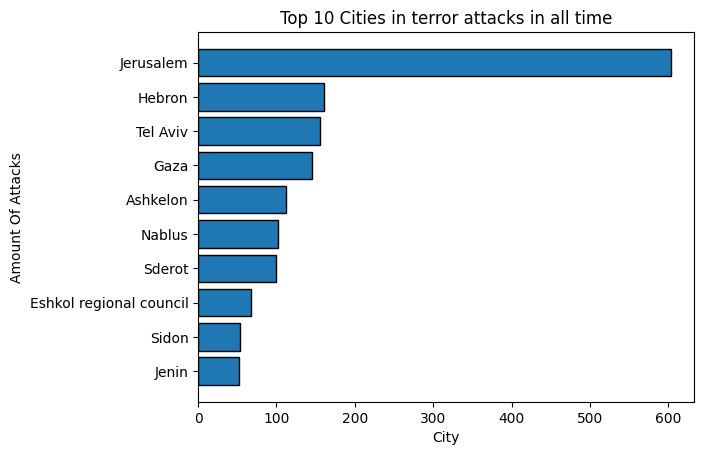

In [22]:
# Top 10 cities where There were most terror attacks in
attacks = terrorism[(terrorism['country_txt'] == 'Israel') | (terrorism['natlty1_txt'] == 'Israel') | (terrorism['natlty2_txt'] == 'Israel') | (terrorism['natlty3_txt'] == 'Israel')].copy()

# Filter unknown cities
attacks = attacks[attacks['city'] != 'Unknown']

# Reset index
attacks.reset_index(inplace = True)

# Calculate attacks per year
attacks = attacks.groupby(['city']).aggregate(attacks=('eventid', 'count'))
attacks.reset_index(inplace=True)

# Sort from highest to lowest
attacks.sort_values(by='attacks', ascending=False, inplace=True)

# Filter top 10 cities
attacks = attacks[attacks['attacks'] > 1]
attacks = attacks.head(10)
attacks.sort_values(by='attacks', ascending=True, inplace=True)

plt.barh(attacks['city'], attacks['attacks'], edgecolor='black')
plt.title('Top 10 Cities in terror attacks in all time')

# Label axises
plt.xlabel("City")
plt.ylabel("Amount Of Attacks")

plt.show();